In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.datasets import mnist
print(tf.__version__)


1.15.2


In [2]:
import core_modules

270 556


In [3]:

batch_size = 16
num_classes = 3 #added 

# the data, split between train and test sets
p = 0.8

n, (x_train, y_train), (x_test, y_test) = core_modules.load_data(p)

x_train, y_train = shuffle(x_train, y_train)


x_train =  x_train.reshape((int(p*n),270,556,1))
x_test  =  x_test.reshape((1-int(p*n),270,556,1))

class_names= []
for i in range(0,n):
    class_names.append(str(i))

# Showing a few examples
#show_image_examples(class_names, x_train, y_train)


x_train, x_test = x_train / 255.0, x_test / 255.0


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(17,17), padding='same', activation='relu', input_shape=(270,556, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(16, kernel_size=(7,7), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(32, kernel_size=(7,7), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.summary()

0
1000
2000
3000
4000
5000
6000
7000
8000
8512 Images loaded across 3 Categories
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 270, 556, 6)       1740      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 185, 6)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 179, 16)       4720      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 59, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 53, 32)        25120     
_________________________________________________________________
flatten (Flatten)         

In [4]:
print(num_classes)

3


In [ ]:
history = model.fit(x_train, y_train,  batch_size=20, validation_split=0.2,epochs=15)

score = model.evaluate(x_test,  y_test, verbose=2)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('\nHistory dict:', history.history)

Train on 5447 samples, validate on 1362 samples
Epoch 1/15
5447/5447 [==============================] - 116s 21ms/sample - loss: 0.8185 - sparse_categorical_accuracy: 0.5878 - val_loss: 0.7746 - val_sparse_categorical_accuracy: 0.6050
Epoch 2/15
5447/5447 [==============================] - 113s 21ms/sample - loss: 0.7930 - sparse_categorical_accuracy: 0.6112 - val_loss: 0.7442 - val_sparse_categorical_accuracy: 0.6351
Epoch 3/15
5447/5447 [==============================] - 114s 21ms/sample - loss: 0.7513 - sparse_categorical_accuracy: 0.6482 - val_loss: 0.7246 - val_sparse_categorical_accuracy: 0.6527
Epoch 4/15
5447/5447 [==============================] - 114s 21ms/sample - loss: 0.7176 - sparse_categorical_accuracy: 0.6672 - val_loss: 0.7097 - val_sparse_categorical_accuracy: 0.6637
Epoch 5/15
5447/5447 [==============================] - 113s 21ms/sample - loss: 0.6943 - sparse_categorical_accuracy: 0.6789 - val_loss: 0.7333 - val_sparse_categorical_accuracy: 0.6505
Epoch 6/15
5447/5

1703/1703 - 5s - loss: 1.4708 - sparse_categorical_accuracy: 0.6870
0.6870229


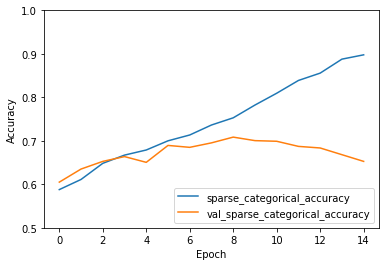

In [6]:
plt.plot(history.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)

In [7]:
keras_model_path = "/home/ec2-user/SageMaker/ECG_Model/out/cnn_11_epochs.h5"
model.save(keras_model_path)  # save() should be called out of strategy scope